In [1049]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1050]:
# Loading and reading the dataset
df = pd.read_csv("Bakery.csv")

In [1051]:
# Viewing the data
df


,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend


* The dataset belongs to "The Bread Basket" a bakery located in Edinburgh. Source: Kaggle
* The dataset provides the transaction details of customers who ordered different items from this bakery online during the time period from 30/10/2016 to 12/03/2017.
The data comprises of 5 variables:
1. TransactionNo - A unique identifier for every single transaction.
2. Items - Different items/products purchased from the bakery.
3. DateTime - The date and time stamp of the transactions.
4. Daypart - Part of the day when a transaction is made (morning, afternoon, evening, night).
5. DayType - A classifier for whether a transaction has been made in the weekends or weekdays.


In [1052]:
# The first 10 values in the dataset
df.head(10)


,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
5,3,Cookies,2016-10-30 10:07:57,Morning,Weekend
6,4,Muffin,2016-10-30 10:08:41,Morning,Weekend
7,5,Coffee,2016-10-30 10:13:03,Morning,Weekend
8,5,Pastry,2016-10-30 10:13:03,Morning,Weekend
9,5,Bread,2016-10-30 10:13:03,Morning,Weekend


In [1053]:
# The last 10 values in the dataset
df.tail(10)

,TransactionNo,Items,DateTime,Daypart,DayType
20497,9681,Tea,2017-09-04 14:30:09,Afternoon,Weekend
20498,9681,Spanish Brunch,2017-09-04 14:30:09,Afternoon,Weekend
20499,9681,Christmas common,2017-09-04 14:30:09,Afternoon,Weekend
20500,9682,Muffin,2017-09-04 14:32:58,Afternoon,Weekend
20501,9682,Tacos/Fajita,2017-09-04 14:32:58,Afternoon,Weekend
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend
20506,9684,Smoothies,2017-09-04 15:04:24,Afternoon,Weekend


## Data exploration

In [1054]:
# The shape of the data
df .shape


(20507, 5)

In [1055]:
print(f"The shape of the data is: {df.shape}. It has {df.shape[0]} rows and {df.shape[1]} columns")

The shape of the data is: (20507, 5). It has 20507 rows and 5 columns


In [1056]:
# Summary of the dataframe. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


The output above shows the data types of each of the variables in the data.
* We have one variable as an integer which is transaction id.
* All other variables in the data are strings

In [1057]:
# Summary statistics for numerical columns in our DataFrame. (The Transaction No. column)
df.describe()

,TransactionNo
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


Data cleaning
* Does the data have any null/missing values?
* Does the data have any duplicate values?


In [1058]:
# Checking for null values
if df.isnull().any().any():
    print(f"There are {df.isnull().sum()} missing values in the dataset")
else:
    print("There are no missing values present in the dataset") 

There are no missing values present in the dataset


In [1059]:
# Checking for duplicates
if df.duplicated().any():
    print(f"There are {df.duplicated().sum()} duplicate values present in the dataset")
else:
    print("There are no duplicate values present in the dataset")

There are 1620 duplicate values present in the dataset


In [1060]:
# Dropping the duplicate values
df.drop_duplicates(inplace=True)

In [1061]:
# View of the data after dropiing all duplicates
df.shape

(18887, 5)

The dataset had 1620 duplicate values.
The new size of the data after dropping these values is (18887, 5). 

## Preprocessing the data
In order to visualize our data better, we need to split the date object into the 3 parts. We will examine the day, month and year features seperately.

In [1062]:
df["Year"]=pd.to_datetime(df["DateTime"]).dt.year
df["Month"]=pd.to_datetime(df["DateTime"]).dt.month
df["Week Day"]=pd.to_datetime(df["DateTime"]).dt.weekday
df["Hour"]=pd.to_datetime(df["DateTime"]).dt.hour

In [1063]:
df

,TransactionNo,Items,DateTime,Daypart,DayType,Year,Month,Week Day,Hour
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016,10,6,9
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016,10,6,10
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016,10,6,10
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016,10,6,10
5,3,Cookies,2016-10-30 10:07:57,Morning,Weekend,2016,10,6,10
...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend,2017,9,0,14
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend,2017,9,0,14
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend,2017,9,0,14
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend,2017,9,0,14


In [1064]:
# Replacing the names of the days of the week
df["Week Day"]=df["Week Day"].replace((0,1,2,3,4,5,6),('Monday','Tuesday' ,'Wednesday' ,'Thursday',
'Friday' ,'Saturday' ,'Sunday'))

In [1065]:
# Replacing the names of the months
df["Month"]=df["Month"].replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','February' ,'March' ,'April' ,'May' ,'June' ,'July'
,'August' ,'September','October' ,'November' ,'December' ))

In [1066]:
df

,TransactionNo,Items,DateTime,Daypart,DayType,Year,Month,Week Day,Hour
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016,October,Sunday,9
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016,October,Sunday,10
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016,October,Sunday,10
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016,October,Sunday,10
5,3,Cookies,2016-10-30 10:07:57,Morning,Weekend,2016,October,Sunday,10
...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend,2017,September,Monday,14
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend,2017,September,Monday,14
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend,2017,September,Monday,14
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend,2017,September,Monday,14


## Data analysis
### 1. Transaction Analysis
* What is the total number of transcations in the dataset?
* How many unique items are sold in the dataset?
* What is the average number of items per transaction? 

In [1067]:
total_transactions = df.shape[0]
print(f"The total number of transactions done is: {total_transactions}")

The total number of transactions done is: 18887


In [1068]:
print(f"There are a total of {df['Items'].nunique()} unique items sold.")

There are a total of 94 unique items sold.


In [1069]:
average_items_per_transaction = df['Items'].nunique() /df.shape[0]

print(f"The average number of items sold per transaction is: {average_items_per_transaction}")

The average number of items sold per transaction is: 0.004976968285063801


### conclusion:
The total number of transactions done is 18,887 with 94 unique items sold.

### 2. Item sales analysis:
* What are the top-selling items?
* What are the least popular items?

In [1070]:
# The 15 best-selling items
products=df["Items"].value_counts().head(15).reset_index(name="Count")
products=products.rename(columns={"index":"Items"})
print(products)

            Items  Count
0          Coffee   4528
1           Bread   3097
2             Tea   1350
3            Cake    983
4          Pastry    815
5        Sandwich    680
6       Medialuna    585
7   Hot chocolate    552
8         Cookies    515
9         Brownie    379
10     Farm House    371
11          Juice    365
12         Muffin    364
13      Alfajores    344
14          Scone    327


C:\Users\user\AppData\Local\Temp\ipykernel_9244\549812249.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x="Items",y="Count",data=products,palette=colors)
C:\Users\user\AppData\Local\Temp\ipykernel_9244\549812249.py:4: UserWarning: 
The palette list has fewer values (12) than needed (15) and will cycle, which may produce an uninterpretable plot.
  ax=sns.barplot(x="Items",y="Count",data=products,palette=colors)


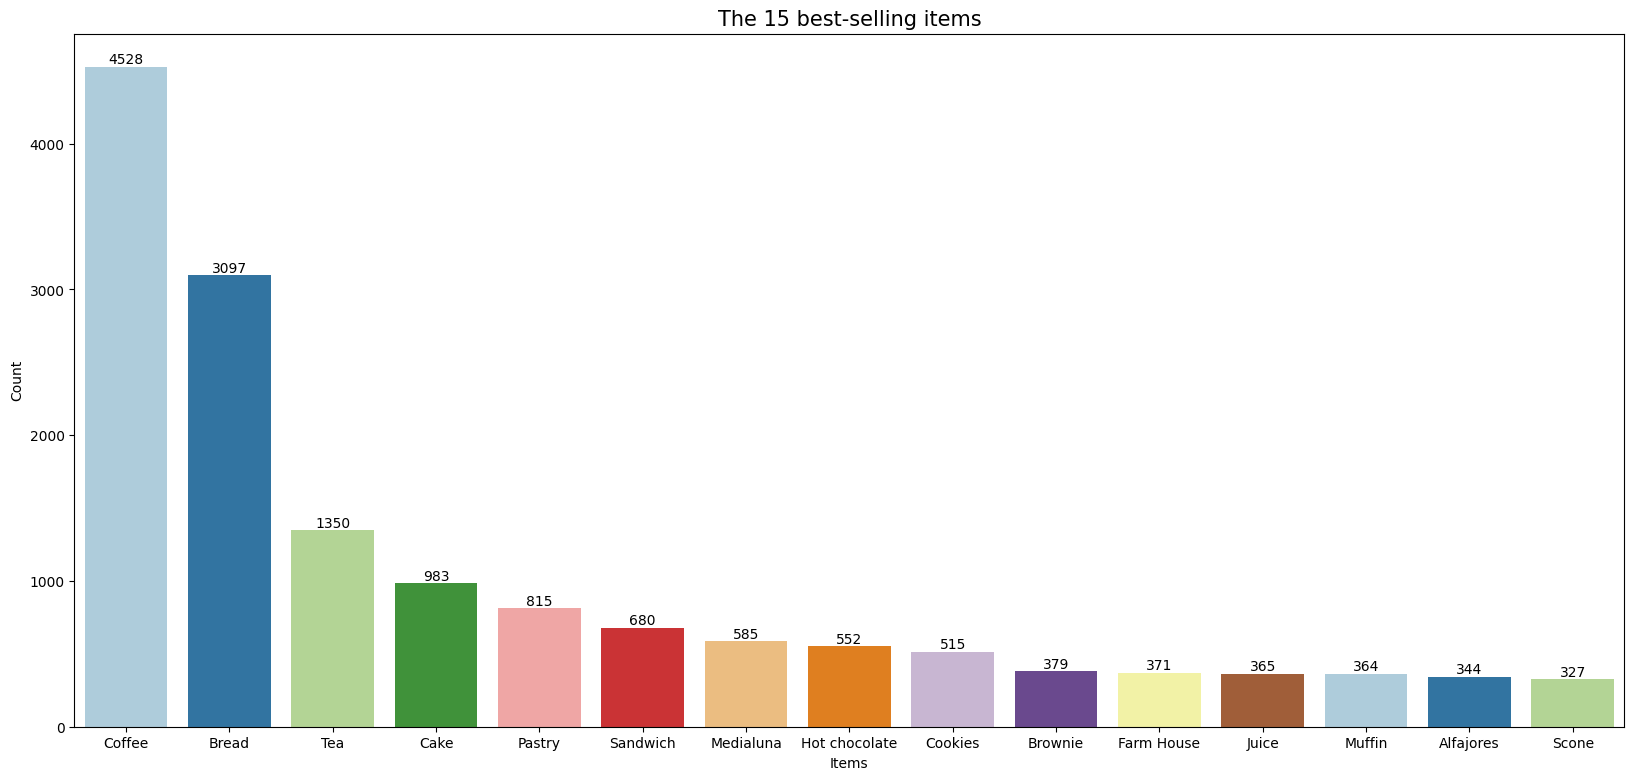

In [1071]:
# Bar graph representing the 15 most popular items in the bakery
plt.figure(figsize=(20,9))
colors=sns.color_palette("Paired")
ax=sns.barplot(x="Items",y="Count",data=products,palette=colors)
for i in ax.containers:
    ax.bar_label(i)
    plt.title("The 15 best-selling items",size=15)

* Most transactions involve Coffee. It is the most popular and best selling item in the bakery.
* The 2nd most popular item is bread, and tea is the 3rd most popular item.

In [1072]:
# The 15 least popular items in the bakery
products=df["Items"].value_counts().tail(15).reset_index(name="Count")
products=products.rename(columns={"index":"Items"})
print(products)

                            Items  Count
0   Raspberry shortbread sandwich      3
1                          Spread      2
2                     Fairy Doors      2
3                  Hack the stack      2
4                   Bowl Nic Pitt      2
5                 Chimichurri Oil      2
6                        Siblings      2
7                    Chicken sand      1
8                        The BART      1
9                      Adjustment      1
10                          Bacon      1
11                   Gift voucher      1
12                 Olum & polenta      1
13                       Raw bars      1
14                        Polenta      1


C:\Users\user\AppData\Local\Temp\ipykernel_9244\2067574931.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x="Items",y="Count",data=products,palette=colors)
C:\Users\user\AppData\Local\Temp\ipykernel_9244\2067574931.py:4: UserWarning: 
The palette list has fewer values (12) than needed (15) and will cycle, which may produce an uninterpretable plot.
  ax=sns.barplot(x="Items",y="Count",data=products,palette=colors)


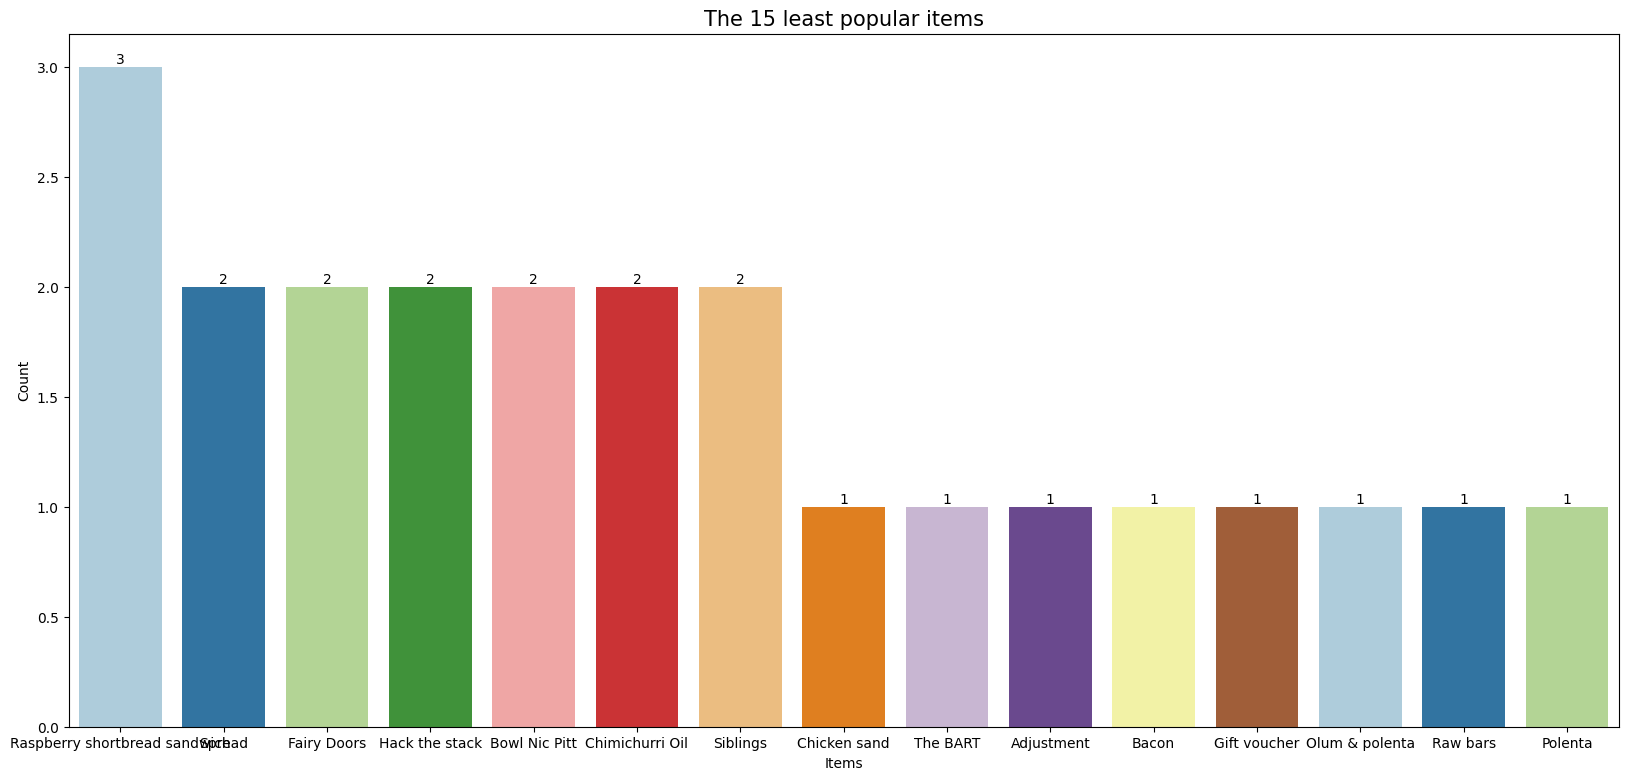

In [1073]:
# Bar graph representing the 15 least popular items in the bakery
plt.figure(figsize=(20,9))
colors=sns.color_palette("Paired")
ax=sns.barplot(x="Items",y="Count",data=products,palette=colors)
for i in ax.containers:
    ax.bar_label(i)
    plt.title("The 15 least popular items",size=15)

## Sales analysis by years
* Which is the peak year of sales?

In [1074]:
Sales_years=df.groupby("Year")["TransactionNo"].count().reset_index()
Sales_years

,Year,TransactionNo
0,2016,7594
1,2017,11293


C:\Users\user\AppData\Local\Temp\ipykernel_9244\1705884430.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Year',y='TransactionNo',data=Sales_years,palette=colors)
C:\Users\user\AppData\Local\Temp\ipykernel_9244\1705884430.py:4: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  ax=sns.barplot(x='Year',y='TransactionNo',data=Sales_years,palette=colors)


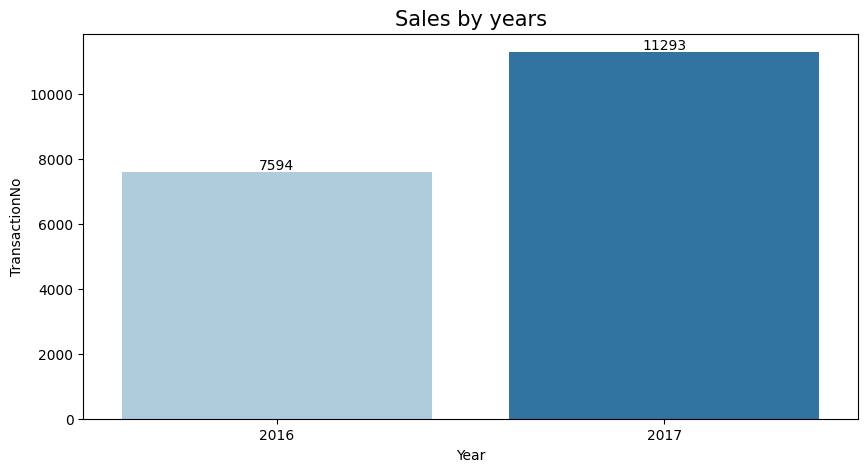

In [1075]:
# Bar graph representing the sales distribution by the year.
plt.figure(figsize=(10,5))
colors=sns.color_palette("Paired")
ax=sns.barplot(x='Year',y='TransactionNo',data=Sales_years,palette=colors)
for i in ax.containers:
    ax.bar_label(i)
    plt.title("Sales by years",size=15)

The peak year of sales and most active year was 2017 with 11,293 transactions.

## Sales analysis by months
* Which is the peak month of sales?

In [1076]:
Sales_month=df.groupby("Month")["TransactionNo"].count().reset_index()
Sales_month

,Month,TransactionNo
0,April,953
1,August,649
2,December,2419
3,February,2415
4,January,2833
5,July,685
6,June,690
7,March,2996
8,May,840
9,November,2875


C:\Users\user\AppData\Local\Temp\ipykernel_9244\4070452813.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x="Month",y="TransactionNo",data=Sales_month,palette=colors)


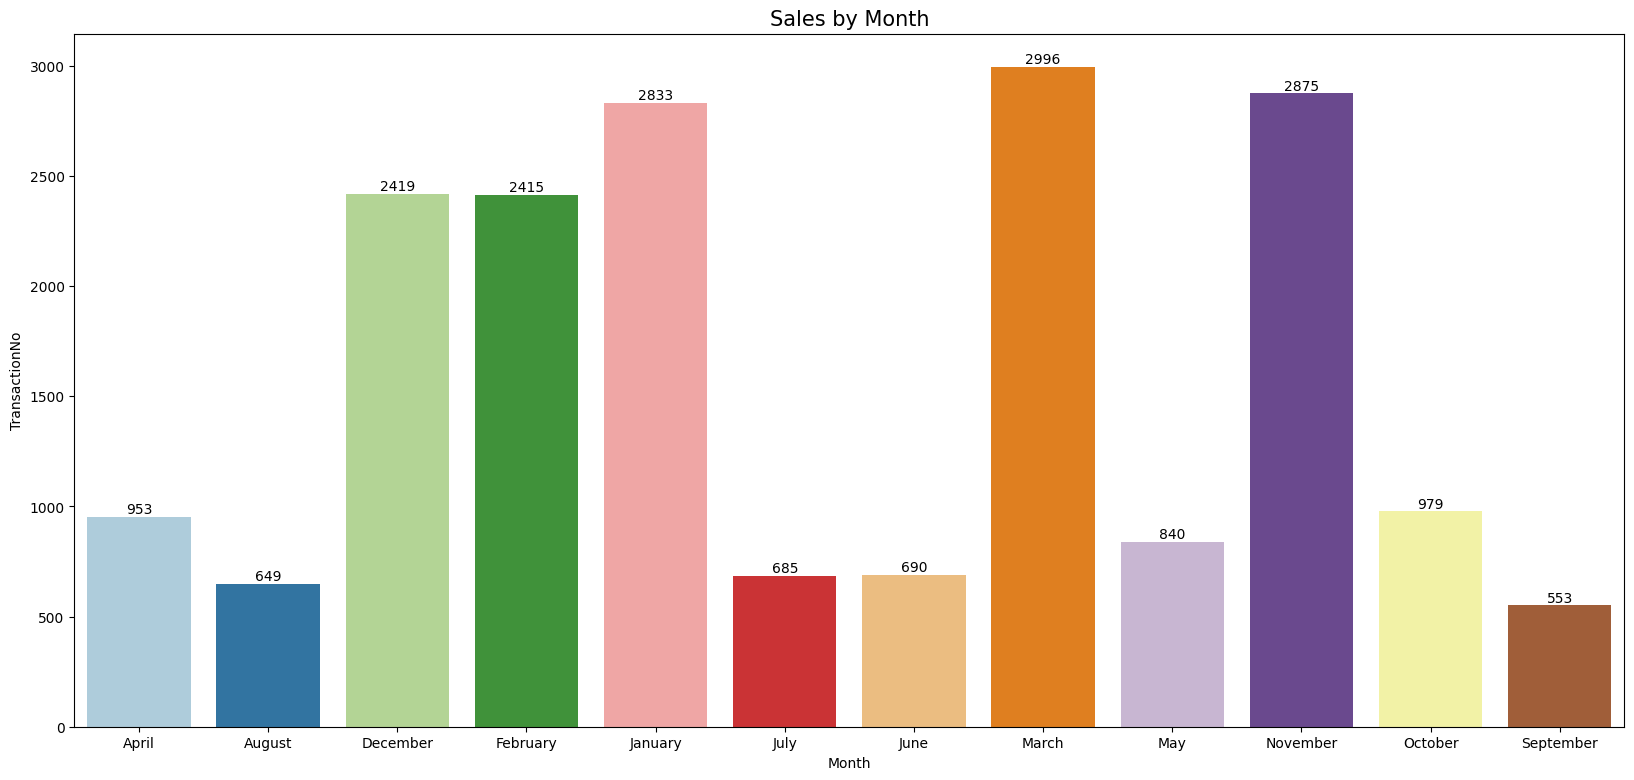

In [1077]:
# Bar graph representing the sales distribution by the month.
plt.figure(figsize=(20,9))
colors=sns.color_palette("Paired")
ax=sns.barplot(x="Month",y="TransactionNo",data=Sales_month,palette=colors)
for i in ax.containers:
    ax.bar_label(i)
    plt.title("Sales by Month",size=15)

The highest count of transactions is observed in the month of March with 2,996 transactions, Novemeber following closely with a total of 2,875 transactions. 
The months with the lowest number of sales are September, August, July and June with a total of 553, 649, 685 and 690 transactions respectively.

## Sales analysis by the days of the week
* Which is the peak day of sales throughout the week?

In [1078]:
Sales_Weekday=df.groupby("Week Day")["TransactionNo"].count().reset_index()
Sales_Weekday

,Week Day,TransactionNo
0,Friday,3007
1,Monday,2814
2,Saturday,3274
3,Sunday,2856
4,Thursday,2396
5,Tuesday,2420
6,Wednesday,2120


C:\Users\user\AppData\Local\Temp\ipykernel_9244\3013649422.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x="Week Day",y="TransactionNo",data=Sales_Weekday,palette=colors)
C:\Users\user\AppData\Local\Temp\ipykernel_9244\3013649422.py:4: UserWarning: The palette list has more values (12) than needed (7), which may not be intended.
  ax=sns.barplot(x="Week Day",y="TransactionNo",data=Sales_Weekday,palette=colors)


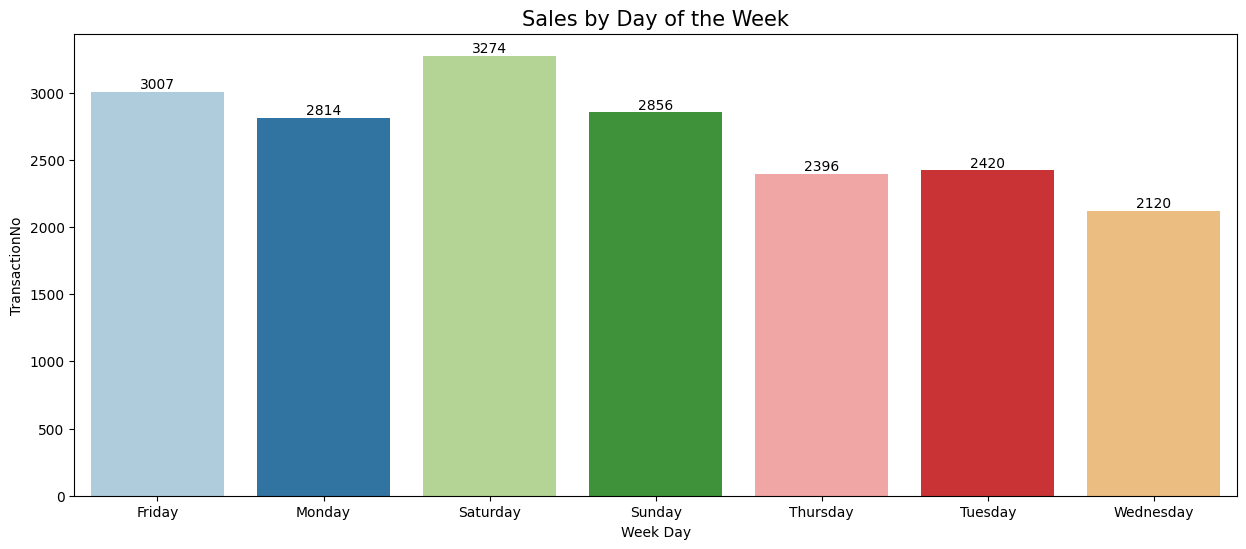

In [1079]:
# Bar graph representing the sales distribution by the specific day of the week.
plt.figure(figsize=(15,6))
colors=sns.color_palette("Paired")
ax=sns.barplot(x="Week Day",y="TransactionNo",data=Sales_Weekday,palette=colors)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Sales by Day of the Week",size=15)
plt.show()

The peak day of sales is Saturdays with a total of 3,274 transactions. It is the day with the highest number of sales. This is followed by Fridays and Sundays with 3,007 and 2,856 transactions respectively.
The days of the week with the least number of sales are Wednesdays with the lowest number, 2,120 transactions, followed by Thursdays and Tuesdays with 2,396 and 2,420 transactions respectively.

### conclusion: 
To maximize on sales, the bakery should always be open on fridays through to sundays since these are the days with the most sales.


## Sales by Day part
* Which part of the day has the highest number of sales? Is it morning, afternoon, evening or night?

In [1080]:
Sales_daypart=df.groupby("Daypart")["TransactionNo"].count().reset_index()
Sales_daypart

,Daypart,TransactionNo
0,Afternoon,10687
1,Evening,490
2,Morning,7697
3,Night,13


C:\Users\user\AppData\Local\Temp\ipykernel_9244\1910412798.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x="Daypart",y="TransactionNo",data=Sales_daypart,palette=colors)
C:\Users\user\AppData\Local\Temp\ipykernel_9244\1910412798.py:4: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  ax=sns.barplot(x="Daypart",y="TransactionNo",data=Sales_daypart,palette=colors)


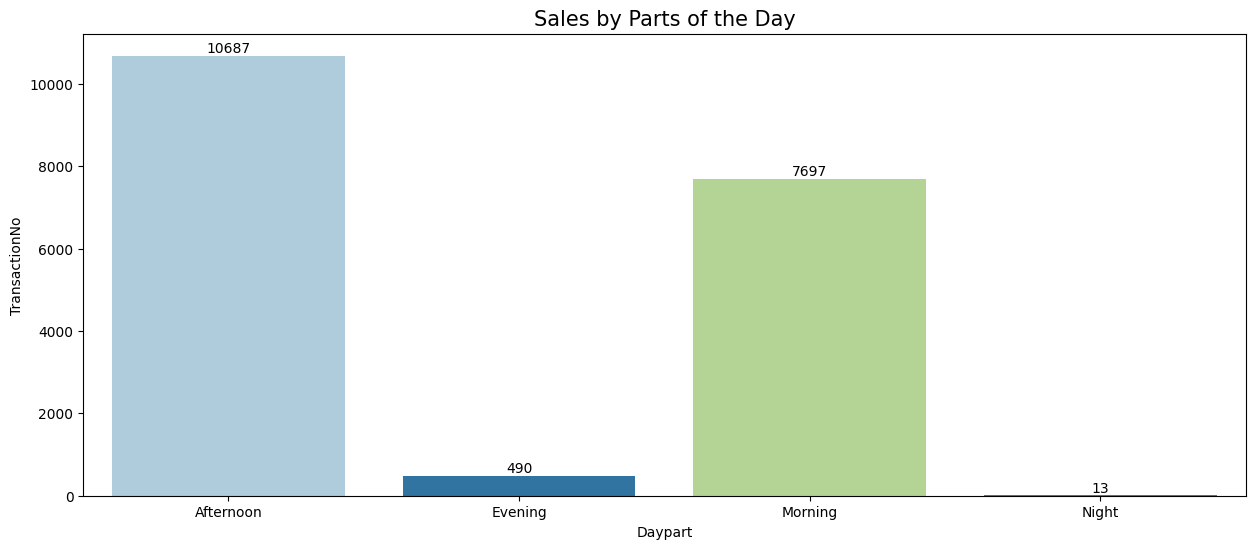

In [1081]:
# Bar graph representing the sales distribution by the different parts of the day.
plt.figure(figsize=(15,6))
colors=sns.color_palette("Paired")
ax=sns.barplot(x="Daypart",y="TransactionNo",data=Sales_daypart,palette=colors)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Sales by Parts of the Day",size=15)
plt.show()

The part of the day with the most number of sales are afternoons with a total of 10,687 transactions.This is followed by mornings, then evenings and then night time having the least number of sales.

### Conclusion:
Afternoon shifts and morning shifts should have the highest number of staff since it is the busiest part of the day.
Night shifts can have lesser staff since the sales are slow during this time.
To maximize sales, the best selling items (coffee, bread and tea as seen earlier) should be always be available at the peak time of the day of sales. That is, mornings and afternoons.

## Product sales by parts of the day
* Which are the most popular items in the morning, afternoon, evening and night?

In [1082]:
dataparts=df.groupby(["Daypart","Items"])["TransactionNo"].count().reset_index().sort_values(["Daypart","TransactionNo"],ascending=False)

dataparts


,Daypart,Items,TransactionNo
222,Night,Vegan Feast,7
221,Night,Valentine's card,2
217,Night,Hot chocolate,1
218,Night,Juice,1
219,Night,Mineral water,1
...,...,...,...
41,Afternoon,Hack the stack,1
55,Afternoon,Mortimer,1
60,Afternoon,Olum & polenta,1
64,Afternoon,Polenta,1


Visual representation is as below bar charts:

C:\Users\user\AppData\Local\Temp\ipykernel_9244\2910600925.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=Daypartdata,x="TransactionNo", y="Items",palette=colors)
C:\Users\user\AppData\Local\Temp\ipykernel_9244\2910600925.py:8: UserWarning: The palette list has more values (12) than needed (10), which may not be intended.
  ax=sns.barplot(data=Daypartdata,x="TransactionNo", y="Items",palette=colors)
C:\Users\user\AppData\Local\Temp\ipykernel_9244\2910600925.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=Daypartdata,x="TransactionNo", y="Items",palette=colors)
C:\Users\user\AppData\Local\Temp\ipykernel_9244\2910600925.py:8: UserWarning: The palette list has more va

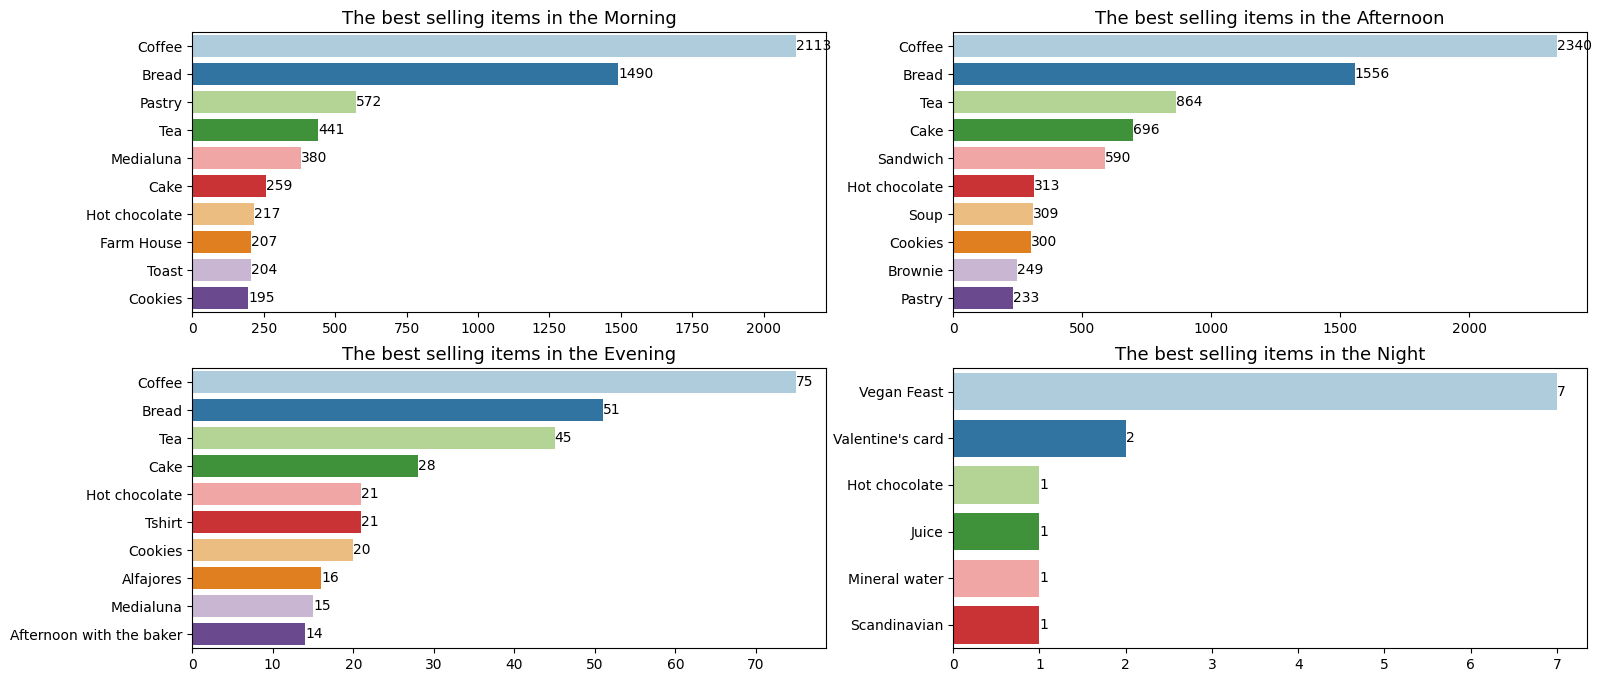

In [1083]:
#  Bar charts showing the most popular items sold during the different parts of the day.
plt.figure(figsize=(18,8))
colors=sns.color_palette('Paired')
dayss=['Morning', 'Afternoon', 'Evening', 'Night']
for i,j in enumerate(dayss):
    plt.subplot(2,2,i+1)
    Daypartdata=dataparts[dataparts["Daypart"]==j].head(10)
    ax=sns.barplot(data=Daypartdata,x="TransactionNo", y="Items",palette=colors)
    for i in ax.containers:
        ax.bar_label(i)
        plt.xlabel('')
        plt.ylabel('')
        plt.title('The best selling items in the '"{}" .format(j),size=13)

Coffee and bread are the best selling items in the mornings, afternoons and evenings. 
The best selling item at night is the vegan feast.

## Product sales by months
* Which are the most popular items each months?
* Which are the least popular items each month?

C:\Users\user\AppData\Local\Temp\ipykernel_9244\2145265342.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=pr,x="Quantity",y="Items",palette=colors)
C:\Users\user\AppData\Local\Temp\ipykernel_9244\2145265342.py:10: UserWarning: The palette list has more values (12) than needed (5), which may not be intended.
  ax=sns.barplot(data=pr,x="Quantity",y="Items",palette=colors)
C:\Users\user\AppData\Local\Temp\ipykernel_9244\2145265342.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=pr,x="Quantity",y="Items",palette=colors)
C:\Users\user\AppData\Local\Temp\ipykernel_9244\2145265342.py:10: UserWarning: The palette list has more values (12) than needed (5), which may not b

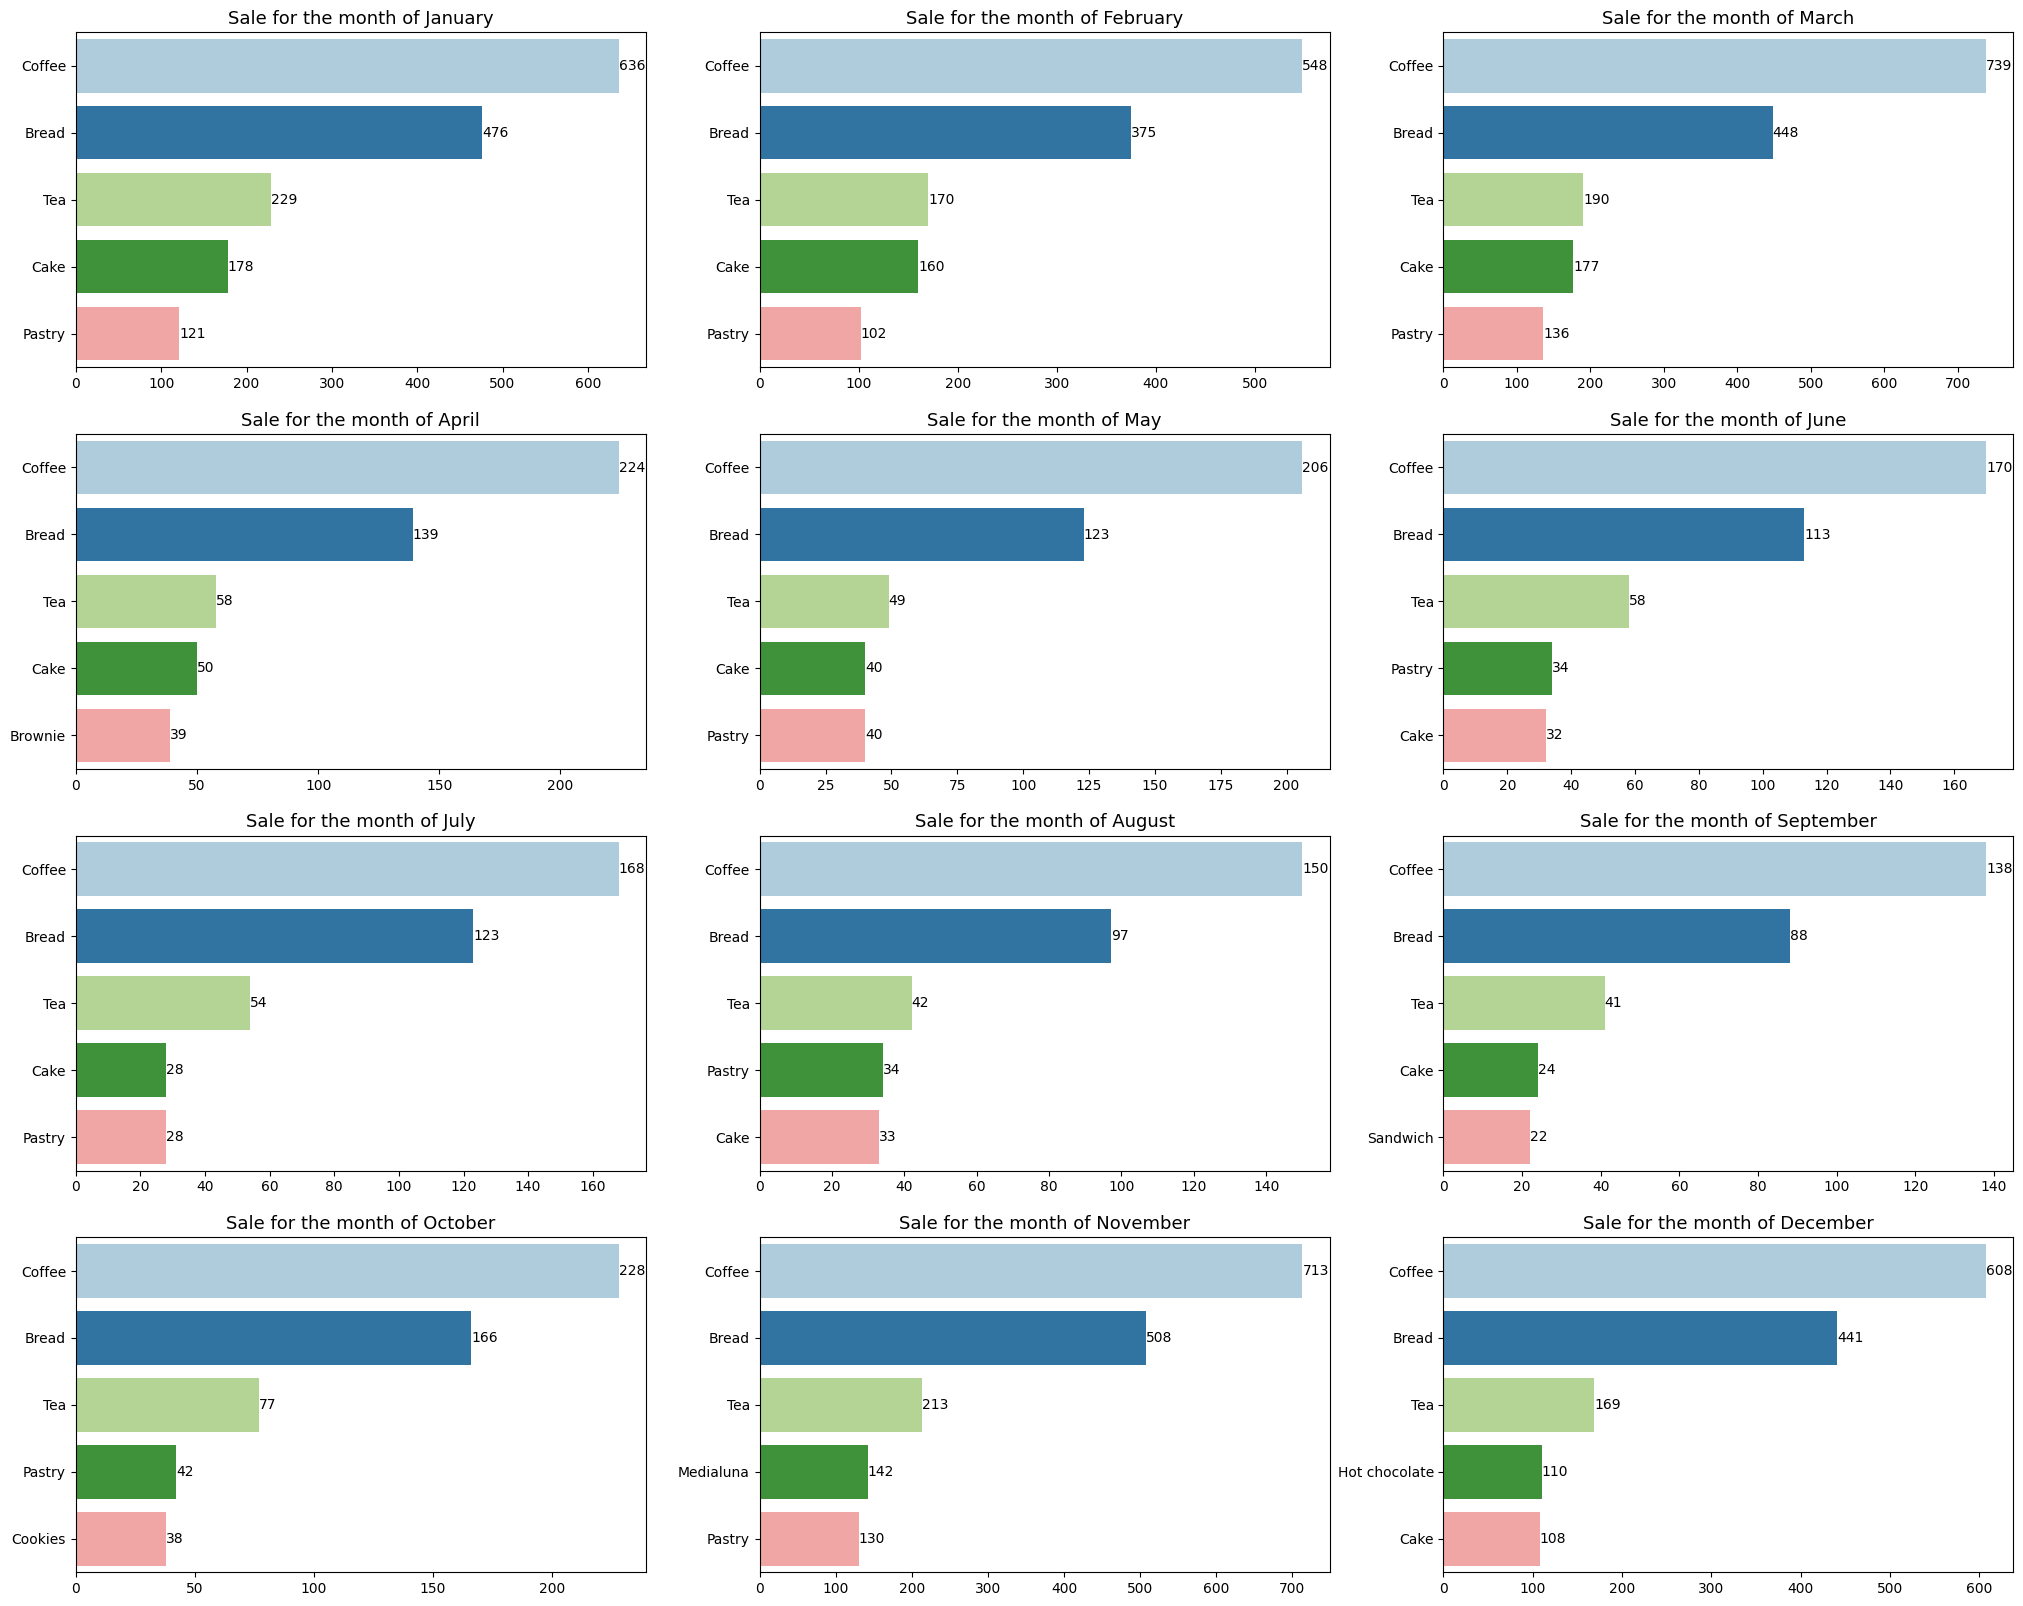

In [1084]:
# Bar charts representing the top 5 best selling items for each month.
productmonths=df.groupby(["Month","Items"])["Items"].count().reset_index(name="Quantity").sort_values(["Month","Quantity"],ascending=False)
monthsales=['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(25,20))
colors=sns.color_palette('Paired')
for i,j in enumerate(monthsales):
    plt.subplot(4,3,i+1)
    pr=productmonths[productmonths["Month"]==j].head(5)
    ax=sns.barplot(data=pr,x="Quantity",y="Items",palette=colors)
    for i in ax.containers:
        ax.bar_label(i)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Sale for the month of {}'.format(j), size=13)

### Major deductions from the above analysis of the bakery datset:

1. Coffee, bread and tea are the best selling items. These 3 items should always be on the menu.
2. The days with the most sales are friday, saturday and sunday.
3. The peak times for sales are mornings, afternoons and evenings. Sales are the least at night time.